In [13]:
import cv2
import warnings
from skimage.filters.rank import entropy
from skimage.morphology import disk
import pandas as pd
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from scipy import ndimage as nd
from skimage.filters import sobel

# Data directory and data category 
DIRECTORY = r"C:\Users\lenovo\Desktop\Rock-Paper-Scissors\train"
CATEGORIES = os.listdir(DIRECTORY)
df = pd.DataFrame( columns = ['Entropy', 'Gaussian', 'Sobel'])
warnings.filterwarnings("ignore")
data = []
labels = []
features = []
# get all the data and labels in given directory
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    filelist = os.listdir(path)
    for fichier in filelist[:]: # filelist[:] makes a copy of filelist.
        if not(fichier.endswith(".png")):
            filelist.remove(fichier)
    
    for img in filelist:
        img_path = os.path.join(path, img)
        image = load_img(img_path)
        
        image = img_to_array(image)
        image = preprocess_input(image)
        
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img2 = img.reshape(-1)


        entropy_img = entropy(img, disk(1))

        entropy1 = entropy_img.reshape(-1).mean()
        features.append(entropy1) 

        

       

        gaussian_img = nd.gaussian_filter(img, sigma=3)

        gaussian_img1 = gaussian_img.reshape(-1).mean()
        features.append(gaussian_img1) 

        sobel_img = sobel(img)

        sobel1 = sobel_img.reshape(-1).mean()
        features.append(sobel1) 
        
        
        df.loc[len(df.index)] = features
        
        
        features = []
        
        labels.append(category)







In [14]:
cv2.imshow('entropy', entropy_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
cv2.imshow('gaussian', gaussian_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
cv2.imshow('sobel', sobel_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
df

,Entropy,Gaussian,Sobel
0,0.669674,0.689635,0.032019
1,0.679112,0.687314,0.032122
2,0.667427,0.681060,0.032306
3,0.698125,0.672518,0.032777
4,0.675442,0.663628,0.033063
...,...,...,...
2515,1.011404,0.682671,0.029446
2516,1.000446,0.682176,0.029372
2517,0.984360,0.682276,0.029387
2518,0.979407,0.682174,0.029397


In [18]:
import collections



# check the data count and balance  
counter=collections.Counter(labels)
counter

Counter({'paper': 840, 'rock': 840, 'scissors': 840})

In [19]:
X = df
y = labels

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=None)

KNN K=3 ile Train Başarısı 90.68783068783068
KNN K=3 ile Test Başarısı 85.87301587301587
KNN K=5 ile Train Başarısı 89.20634920634922
KNN K=5 ile Test Başarısı 84.12698412698411
KNN K=7 ile Train Başarısı 88.57142857142858
KNN K=7 ile Test Başarısı 83.01587301587301
KNN K=10 ile Train Başarısı 87.08994708994709
KNN K=10 ile Test Başarısı 80.15873015873017
SVM Kernel=linear ile train Başarısı 51.269841269841265
SVM Kernel=linear ile test Başarısı 51.587301587301596
SVM Kernel=poly ile train Başarısı 62.275132275132286
SVM Kernel=poly ile test Başarısı 56.19047619047619
SVM Kernel=rbf ile train Başarısı 60.52910052910052
SVM Kernel=rbf ile test Başarısı 49.20634920634921
SVM Kernel=sigmoid ile train Başarısı 26.402116402116405
SVM Kernel=sigmoid ile test Başarısı 23.174603174603174
Decision Train Tree Başarısı = 80.0
Decision Test Tree Başarısı = 77.77777777777777
KNN Train Başarısı = 90.68783068783068
KNN Test Başarısı = 85.87301587301587
Logistic Regression = 92.5925925925926
logistic 

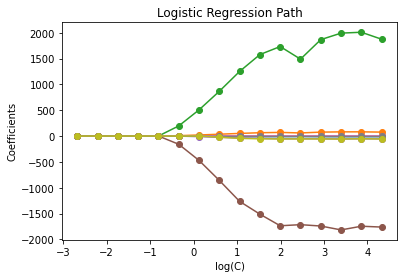

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import l1_min_c

ks = [3,5,7,10]

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    scores = cross_val_score(
    knn, X_train, y_train, cv=10, scoring='accuracy')
    
    print('KNN K={} ile Train Başarısı {}'.format(k,scores.mean()*100))
    
    scores = cross_val_score(
    knn, X_test, y_test, cv=10, scoring='accuracy')
    
    print('KNN K={} ile Test Başarısı {}'.format(k,scores.mean()*100))
    
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    clf = SVC(kernel=kernel)
    scores = cross_val_score(
        clf, X_train, y_train, cv=10, scoring='accuracy')
    print('SVM Kernel={} ile train Başarısı {}'.format(kernel,scores.mean()*100))
    
    scores = cross_val_score(
        clf, X_test, y_test, cv=10, scoring='accuracy')    
    
    print('SVM Kernel={} ile test Başarısı {}'.format(kernel,scores.mean()*100))

    
# Applying Decision Tree
clf = DecisionTreeClassifier( criterion='entropy',random_state=0,max_depth=3)
clf.fit(X_train, y_train)
    

scores_train = cross_val_score(
    clf, X_train, y_train, cv=10, scoring='accuracy')

scores_test = cross_val_score(
    clf, X_test, y_test, cv=10, scoring='accuracy')

print('Decision Train Tree Başarısı = {}'.format((scores_train.mean()*100)))
print('Decision Test Tree Başarısı = {}'.format((scores_test.mean()*100)))

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

scores_train = cross_val_score(
    knn, X_train, y_train, cv=10, scoring='accuracy')

scores_test = cross_val_score(
    knn, X_test, y_test, cv=10, scoring='accuracy')

print('KNN Train Başarısı = {}'.format((scores_train.mean()*100)))
print('KNN Test Başarısı = {}'.format((scores_test.mean()*100)))


cs = l1_min_c(X, y, loss="log") * np.logspace(0, 7, 16)

reg = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)

coefs_ = []
for c in cs:
    reg.set_params(C=c)
    reg.fit(X, y)
    coefs_.append(reg.coef_.ravel().copy())

coefs_ = np.array(coefs_)
reg.fit(X_train, y_train)

scores_train = cross_val_score(
    reg, X_train, y_train, cv=10, scoring='accuracy')
scores_test = cross_val_score(
    reg, X_test, y_test, cv=10, scoring='accuracy')

print('Logistic Regression = {}'.format((scores_train.mean()*100)))
print('logistic Regression = {}'.format((scores_test.mean()*100)))

plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.show()


Confusion matrix, without normalization
[[201   3  12]
 [ 10 202   8]
 [ 10   6 178]]
Normalized confusion matrix
[[0.93055556 0.01388889 0.05555556]
 [0.04545455 0.91818182 0.03636364]
 [0.05154639 0.03092784 0.91752577]]


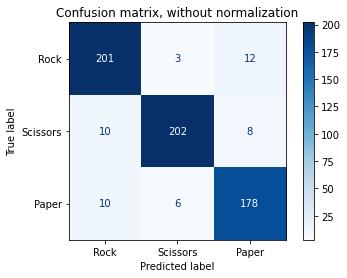

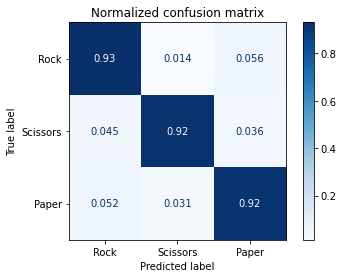

In [22]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ['Rock', 'Scissors', 'Paper']

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [23]:
import cv2
from skimage.filters.rank import entropy
from skimage.morphology import disk
import pandas as pd
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from scipy import ndimage as nd
from skimage.filters import sobel

# Data directory and data category 
DIRECTORY = r"C:\Users\lenovo\Desktop\Rock-Paper-Scissors\pred"
CATEGORIES = os.listdir(DIRECTORY)
df = pd.DataFrame( columns = ['Entropy', 'Gaussian', 'Sobel'])

data = []
features = []
# get all the data and labels in given directory
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    filelist = os.listdir(path)
    for fichier in filelist[:]: # filelist[:] makes a copy of filelist.
        if not(fichier.endswith(".png")):
            filelist.remove(fichier)
    
    for img in filelist:
        img_path = os.path.join(path, img)
        image = load_img(img_path)
        
        image = img_to_array(image)
        image = preprocess_input(image)
        
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img2 = img.reshape(-1)


        entropy_img = entropy(img, disk(1))

        entropy1 = entropy_img.reshape(-1).mean()
        features.append(entropy1) 

        

       

        gaussian_img = nd.gaussian_filter(img, sigma=3)

        gaussian_img1 = gaussian_img.reshape(-1).mean()
        features.append(gaussian_img1) 

        sobel_img = sobel(img)

        sobel1 = sobel_img.reshape(-1).mean()
        features.append(sobel1) 
        
        
        df.loc[len(df.index)] = features
        
        
        features = []







In [24]:
clf.predict(df)

array(['paper', 'paper', 'rock', 'rock', 'scissors'], dtype='<U8')